
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,20.83,22.32,30.24,13.12,16.46,15.52,10.52,18.09,30.24,1.67
1,DIA,DJIA ETF,US Stocks:Large Cap,30.39,14.50,22.68,8.69,15.67,14.28,9.94,18.32,22.68,1.24
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,-18.16,30.46,53.63,23.53,25.91,21.42,15.27,19.94,53.63,2.69
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,28.76,31.53,34.45,14.12,17.25,16.12,10.71,18.98,34.45,1.82
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,64.97,99.69,48.55,13.58,17.91,25.32,13.93,25.32,48.55,1.92
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,90.27,61.85,36.68,10.79,14.90,19.82,12.37,23.28,36.68,1.58
6,IWD,Russell 1000 Value ETF,US Stocks:Value,93.78,31.01,20.09,7.15,11.63,14.64,9.37,19.47,20.09,1.03
7,IWF,Russell 1000 Growth ETF,US Stocks,-16.91,22.14,43.72,19.84,21.77,19.04,13.49,19.19,43.72,2.28
8,RSP,S&P 500 Equal Weight ETF,US Stocks,82.13,33.86,30.57,11.10,14.67,15.44,9.97,21.16,30.57,1.44
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,66.07,107.05,44.66,11.97,16.68,22.43,11.84,25.96,44.66,1.72


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
17,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,-7.15,34.01,50.89,25.17,27.73,22.42,15.06,20.81,50.89,2.45
13,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,87.74,45.94,42.63,42.63,42.63,16.03,9.94,20.46,42.63,2.08
12,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,57.44,10.53,41.04,8.34,14.43,17.33,10.62,20.69,41.04,1.98
22,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,-26.62,9.88,39.78,16.12,18.14,22.80,15.43,21.38,39.78,1.86
21,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,-16.72,16.49,22.10,11.27,12.74,9.50,6.80,15.98,22.10,1.38
16,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,104.39,6.09,24.20,6.89,13.86,17.16,9.76,23.34,24.20,1.04
15,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,265.82,65.02,21.29,5.25,15.73,20.20,10.77,23.96,21.29,0.89
18,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,-29.75,-17.48,10.01,7.99,6.95,12.08,9.70,13.57,10.01,0.74
14,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,771.85,114.69,13.35,-6.55,1.01,35.06,16.34,40.61,13.35,0.33
19,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,9.81,11.60,2.42,10.29,8.83,13.89,8.86,15.60,2.42,0.16


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLK,XLC,XLB,XLY,XLV,XLI,XLF,XLP,XLE,XLRE,XLU,All S&P500 Sectors Portfolio
Annual Returns,50.89,42.63,41.04,39.78,22.10,24.20,21.29,10.01,13.35,2.42,-6.02,22.37
Std Dev,20.81,20.46,20.69,21.38,15.98,23.34,23.96,13.57,40.61,15.60,13.82,18.03
Sharpe Ratio,2.45,2.08,1.98,1.86,1.38,1.04,0.89,0.74,0.33,0.16,-83.20,1.24
Weight,0.06,0.10,0.09,0.06,0.14,0.10,0.09,0.10,0.06,0.11,0.09,1.00
Worst Typical Down Year,9.27,1.71,-0.34,-2.98,-9.86,-22.48,-26.63,-17.13,-67.87,-28.78,-33.66,-13.70
Black Swan,-11.54,-18.75,-21.03,-24.36,-25.84,-45.82,-50.59,-30.70,-108.48,-44.38,-47.48,-31.73


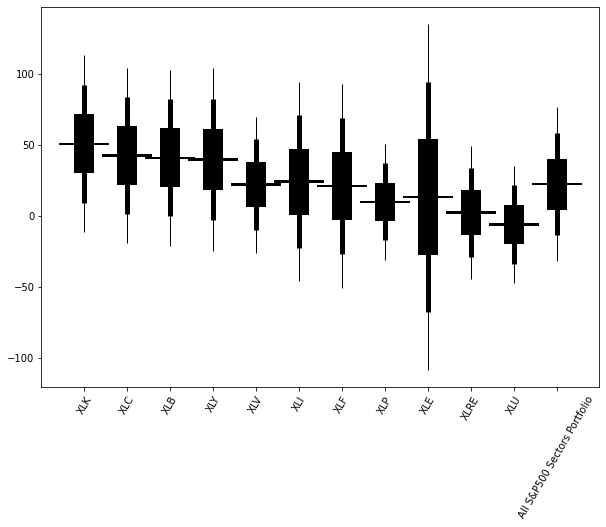

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

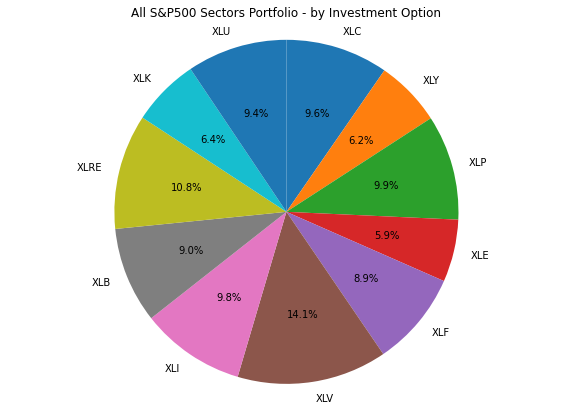

XLC    0.10
XLY    0.06
XLP    0.10
XLE    0.06
XLF    0.09
XLV    0.14
XLI    0.10
XLB    0.09
XLRE   0.11
XLK    0.06
XLU    0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLK                            0.0636
    XLC                            0.0964
    XLB                            0.0902
    XLY                            0.0621
    XLV                            0.1409
    XLI                            0.0982
    XLF                            0.0890
    XLP                            0.0988
    XLE                            0.0586
    XLRE                           0.1081
    XLU                            0.0941


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...........

All S&P500 Sectors Portfolio Metrics:         
    max_sharpe_ratio                      1.95
    annual_return                        38.20
    std_dev                              19.60
    worst typical down year              -1.00
    black_swan                          -20.60


All S&P500 Sectors Portfolio Weights:
    XLK                            0.2100
    XLC                            0.1700
    XLB                            0.2100
    XLY                            0.2200
    XLV                            0.0300
    XLI                            0.0500
    XLF                            0.0400
    XLP                            0.0000
    XLE                            0.0000
    XLRE                           0.0700
    XLU                            0.0000



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).